# 模型评估和调优

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("wdbc.data")
# pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",header=None)

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
842302      568 non-null int64
M           568 non-null object
17.99       568 non-null float64
10.38       568 non-null float64
122.8       568 non-null float64
1001        568 non-null float64
0.1184      568 non-null float64
0.2776      568 non-null float64
0.3001      568 non-null float64
0.1471      568 non-null float64
0.2419      568 non-null float64
0.07871     568 non-null float64
1.095       568 non-null float64
0.9053      568 non-null float64
8.589       568 non-null float64
153.4       568 non-null float64
0.006399    568 non-null float64
0.04904     568 non-null float64
0.05373     568 non-null float64
0.01587     568 non-null float64
0.03003     568 non-null float64
0.006193    568 non-null float64
25.38       568 non-null float64
17.33       568 non-null float64
184.6       568 non-null float64
2019        568 non-null float64
0.1622      568 non-null float64
0.6656 

In [5]:
df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [6]:
X = df.iloc[:,2:].values
y = df.iloc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [8]:
le.transform(['M','B'])

array([1, 0], dtype=int64)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test =\
train_test_split(X,y,test_size=0.2, random_state=1)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [12]:
pipe_lr = Pipeline([('scl',StandardScaler()),
                    ('pca',PCA(n_components=2)),
                    ('clf',LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


# K折交叉验证

In [13]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
kforld = StratifiedKFold(y=y_train, 
                         n_folds=10, 
                         random_state=1)

In [15]:
scores = []
for k, (train, test) in enumerate(kforld):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print(train.shape,test.shape)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]),score))

(408,) (46,)
Fold: 1, Class dist.: [249 159], Acc: 1.000
(408,) (46,)
Fold: 2, Class dist.: [249 159], Acc: 0.935
(408,) (46,)
Fold: 3, Class dist.: [249 159], Acc: 0.891
(408,) (46,)
Fold: 4, Class dist.: [249 159], Acc: 0.935
(408,) (46,)
Fold: 5, Class dist.: [249 159], Acc: 1.000
(408,) (46,)
Fold: 6, Class dist.: [249 159], Acc: 0.935
(408,) (46,)
Fold: 7, Class dist.: [249 159], Acc: 0.978
(410,) (44,)
Fold: 8, Class dist.: [250 160], Acc: 0.932
(410,) (44,)
Fold: 9, Class dist.: [250 160], Acc: 0.955
(410,) (44,)
Fold: 10, Class dist.: [250 160], Acc: 0.955


In [16]:
# 250+160 = 410， + 454/10 =45.4 = 454
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.951 +/- 0.032


In [17]:
y_train

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,

In [18]:
print(np.bincount(y_train),sum(y_train))


[277 177] 177


In [19]:
# for understanding bincount
print("y_train.shape =  %s; train.shape= %s; test.shape= %s" % (y_train.shape,train.shape,test.shape))

y_train.shape =  (454,); train.shape= (410,); test.shape= (44,)


In [20]:
from sklearn.cross_validation import cross_val_score

In [21]:
scores = cross_val_score(estimator=pipe_lr, 
                         X=X_train, 
                         y=y_train, 
                         cv=10, 
                         n_jobs=1)

In [22]:
print("CV accuracy: %.3f +/- %.3f" % (np.mean(scores),np.std(scores)))
# 结果居然一样哎

CV accuracy: 0.951 +/- 0.032


# Learning Curve

In [23]:
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

D:\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


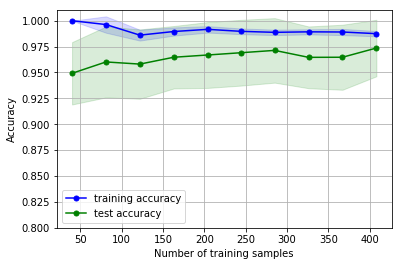

In [24]:
pipe_lr = Pipeline([('scl',StandardScaler()),
                    ('clf',LogisticRegression(penalty='l2',random_state=0))])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, 
                                                        X=X_train, 
                                                        y=y_train, 
                                                        train_sizes=np.linspace(0.1,1.0,10),
                                                        cv=10,
                                                        n_jobs=1)
train_mean,train_std,test_mean,test_std = np.mean(train_scores, axis=1),\
                                          np.std(train_scores,axis=1),\
                                          np.mean(test_scores,axis=1),\
                                          np.std(test_scores,axis=1)
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.plot(train_sizes,test_mean,color='green',marker='o',markersize=5,label='test accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc="lower left")
plt.ylim([0.8, 1.01])
plt.show()

# Validation Curve

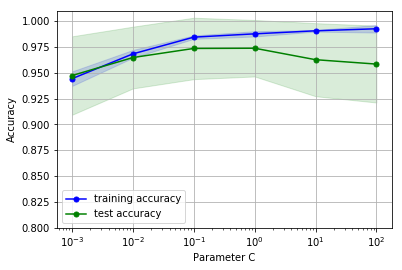

In [25]:
from sklearn.learning_curve import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

train_scores, test_scores = validation_curve(estimator=pipe_lr, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='clf__C',
                                             param_range=param_range,
                                             cv=10)
train_mean,train_std,test_mean,test_std = np.mean(train_scores, axis=1),\
                                          np.std(train_scores,axis=1),\
                                          np.mean(test_scores,axis=1),\
                                          np.std(test_scores,axis=1)
plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.plot(param_range,test_mean,color='green',marker='o',markersize=5,label='test accuracy')
plt.fill_between(param_range,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.fill_between(param_range,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc="lower left")
plt.ylim([0.8, 1.01])
plt.show()

In [1]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [27]:
pipe_svc = Pipeline([('scl',StandardScaler()),
                     ('clf',SVC(random_state=1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C':param_range,
               'clf__kernel':['linear']},
              {'clf__C':param_range,
               'clf__gamma':param_range,
               'clf__kernel':['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)


0.9713656387665198


In [28]:
print(gs.best_params_)

{'clf__C': 0.1, 'clf__kernel': 'linear'}


In [29]:
clf = gs.best_estimator_
clf.fit(X_train,y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.982


In [30]:
gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)
scores = cross_val_score(gs, X, y, scoring='accuracy',cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.974 +/- 0.008


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth':[1,2,3,4,5,6,7,None]}],
                  scoring='accuracy',
                  cv=5)
scores = cross_val_score(gs,
                         X_train,
                         y_train,
                         scoring='accuracy',
                         cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.925 +/- 0.025


In [33]:
from sklearn.metrics import confusion_matrix


In [34]:
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(confmat)

[[79  1]
 [ 0 34]]


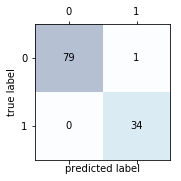

In [35]:
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, 
                s=confmat[i,j],
                va='center',
                ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [36]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score


In [37]:
print('Precision: %.3f' % precision_score(y_true=y_test,y_pred=y_pred))

Precision: 0.971


In [38]:
print('Recall: %.3f' % recall_score(y_true=y_test,y_pred=y_pred))

Recall: 1.000


In [39]:
print('F1: %.3f' %f1_score(y_true=y_test,y_pred=y_pred))

F1: 0.986


In [40]:
from sklearn.metrics import make_scorer, f1_score

In [41]:
scorer = make_scorer(f1_score,pos_label=0)

In [42]:
gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10)

In [43]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

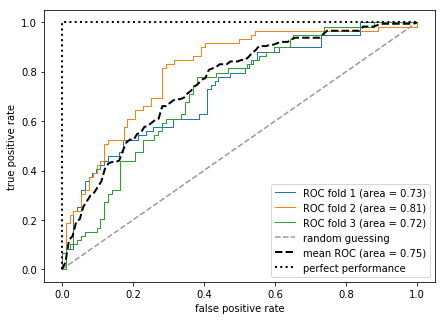

In [56]:
X_train2 = X_train[:, [4,14]]
cv = StratifiedKFold(y_train, 
                     n_folds=3,
                     random_state=1)
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_tpr = []
for i, (train,test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],probas[:,1],pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,tpr,lw=1,label='ROC fold %d (area = %0.2f)' % (i+1,roc_auc))

plt.plot([0,1],
         [0,1],
         linestyle='--',
         color=(0.6,0.6,0.6),
         label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label='mean ROC (area = %0.2f)' % mean_auc, lw =2)
plt.plot([0,0,1],
         [0,1,1],
         lw=2,
         linestyle=':',
         color='black',
         label='perfect performance')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()